In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#Read Dataset
advertising = pd.read_csv("advertising.csv")
advertising.shape

(200, 4)

In [3]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

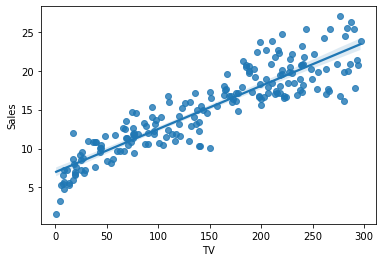

In [6]:
# Visualize the dataset
sns.regplot(x=advertising['TV'] , y=advertising['Sales'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

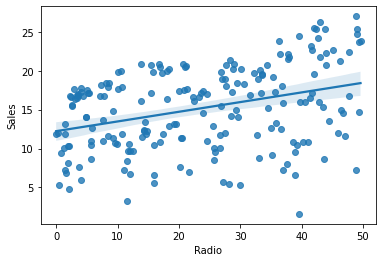

In [7]:
sns.regplot(x='Radio',y='Sales',data=advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

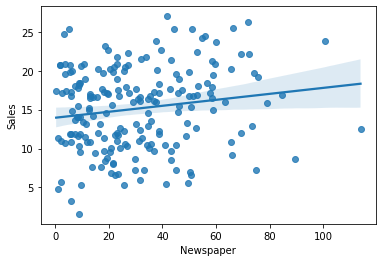

In [8]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)

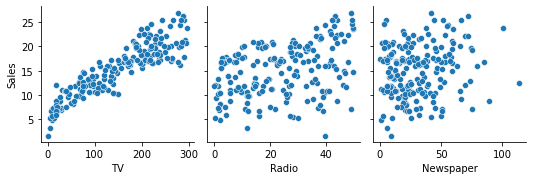

In [9]:
# Time for pairplot
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=advertising)

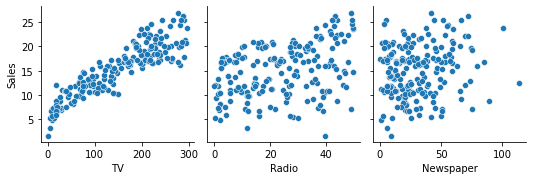

In [10]:
# Time for pairplot
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=advertising,dropna=True)

In [11]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

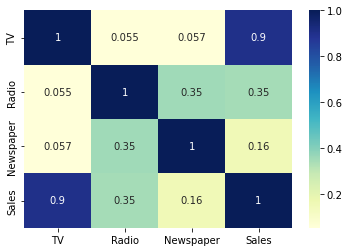

In [12]:
sns.heatmap(advertising.corr(),cmap="YlGnBu",annot=True)

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

## Building the linear model.
 **STEPS**
 - Create X and Y , where x is predictive variable i.e TV and y is Sales.
 - Create Train and Test with ratio 70% train set and 30% test set.
 - Train your model on training set
 - Evaluate the model (training set and test set) 

In [13]:
# Create X and Y
X=advertising['TV'] # Keeping X capital as it is dataframe and it can be multiple in numbers
y=advertising['Sales'] # Keeping y as lower case it is predictive variable .

In [14]:
# Train test split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.70 , random_state=100)

In [15]:
print(X_train.shape)
print(y_train.shape)

(140,)
(140,)


In [16]:
print(X_test.shape)
print(y_test.shape)

(60,)
(60,)


In [17]:
# Training the model.
# Now training using statesmodel first , but there is one problem with statesmodel i.e it don't have constant "c"
# Here "c" as constant is y=mx+"c" , to add "c" explicitly  y=c.constant+m1.tv
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [18]:
# Fitting the model
lr = sm.OLS(y_train , X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
# Sales  = 6.9486 + 0.054.TV
# Here we can say , coefficient is positive mean sales figure is positive , and from above pairplot we can see that it is true figure.
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           1.52e-52
Time:                        01:11:45   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

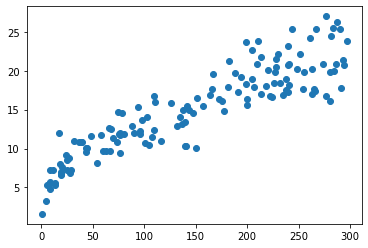

In [20]:
# Scatter plot for training set data
plt.scatter(X_train,y_train)

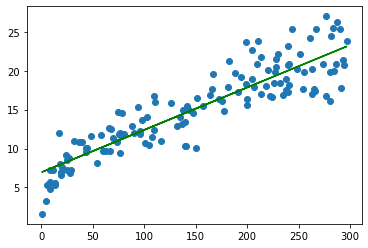

In [21]:
# Now plot the prediction model

y_train_pred = lr_model.predict(X_train_sm) # Trained model 

plt.scatter(X_train,y_train)
plt.plot(X_train , y_train_pred,'green')  # or plt.plot(X_train , 6.9487+0.0545*X_train,'green') 
plt.show()

## Residual analysis (distribution of error terms)

In [22]:
#error = fraction of (y_train , y_train_pred )
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

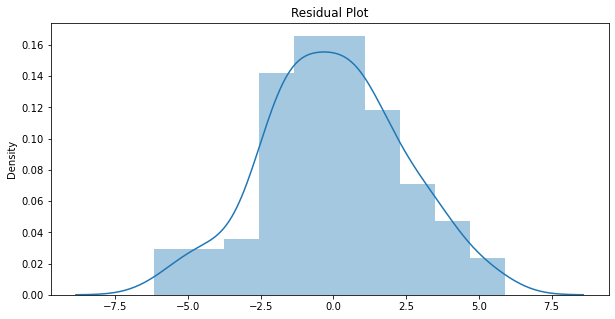

In [23]:
residual = y_train-y_train_pred
# Plot the residual
plt.figure(figsize=[10,5])
sns.distplot(residual)
plt.title("Residual Plot")
plt.show()

## Linear regression using SKlearn method

In [24]:
# Train test split again
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.70 , random_state=100)

### Steps in sklearn model building
- create object of linear regression
- fit the model
- See the parameters of model and make predictiom of model
- evaluate model i.e R square , etc.

In [41]:
X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [42]:
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(60, 1)

In [43]:
#create object of linear regression
lm = LinearRegression()

# Fit the model

lm.fit(X_train_lm,y_train)

LinearRegression()

In [44]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [45]:
lm.coef_

array([0.05454575])

In [46]:
lm.intercept_

6.948683200001357

In [47]:
# Make prediction on test and training set
y_train_pred = lm.predict(X_train_lm)
X_test_pred = lm.predict(X_test_lm)

In [48]:
y_train_pred

array([18.58874687, 15.21236477, 18.13056255, 14.74327129, 14.27417782,
       11.32325258, 20.02875475, 11.76507318,  8.00687081, 19.26511421,
       14.37781475,  8.3177816 ,  9.02142181, 16.35782558, 12.93780687,
       20.04511848, 19.60875245, 10.55415747, 18.86147564, 19.73966226,
        8.24687212, 10.64688525, 23.11604436, 14.65599809, 16.49964454,
       18.97602172, 11.11597872, 20.79239529, 17.37237658, 22.63604174,
       12.42507679, 19.38511486, 13.80508434, 11.02325094, 10.08506399,
       21.27785249, 21.28876164, 19.89784494, 19.34147826, 17.84692463,
       19.40147859, 22.80513357, 22.05240218, 17.84692463, 20.00148187,
       10.95234146, 22.45604075, 14.9832726 , 19.16693185, 17.79783345,
       22.04149303,  7.66868714,  7.58686851, 22.23240317,  9.10324044,
       21.43603517,  8.44869141, 22.25967604, 11.21416108, 15.85600465,
       18.59420145, 22.96331626,  7.96868878, 11.06688755, 16.04691479,
        9.38687836, 12.93780687,  7.42323125, 21.50694465, 18.23

In [49]:
X_test_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [50]:
# EVALUATE THE MODEL
print(r2_score(y_true=y_train , y_pred=y_train_pred))
print(r2_score(y_true=y_test , y_pred=X_test_pred))

0.8157933136480389
0.7921031601245662
